<a href="https://colab.research.google.com/github/Alfred78w/AI_project/blob/main/classification_of_email_spam_or_no_spam_using_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
spam_data = pd.read_csv('spam.csv')

Affichage des données

In [ ]:
#print(spam_data.head())
#print(spam_data.describe())
#print(spam_data.info())
print(spam_data.shape)

Preprocessing

In [ ]:
X = spam_data.drop('spam', axis=1)
y = spam_data['spam']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
corr_matrix = spam_data.corr()
corr_matrix["spam"].sort_values(ascending=False)
print(corr_matrix)

In [ ]:
min_x_train = x_train.min()
max_x_train = x_train.max()

#print("Min de x_train :", min_x_train)
#print("Max de x_train :", max_x_train)

x_train_norm = (x_train-min_x_train)/(max_x_train-min_x_train)
x_test_norm = (x_test-min_x_train)/(max_x_train-min_x_train)

pca

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(0.90)
pca.fit(x_train_norm)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.95)

In [ ]:
train_pca = pca.transform(x_train_norm)
test_pca = pca.transform(x_test_norm)


In [ ]:
pca.n_components_


43

In [ ]:
print(X.shape)

#print(spam_data['spam'].describe())


(4601, 57)


Architecture du model

In [ ]:
num_layer1 = 100
num_layer2 = 100

# Création du modèle
A_model = Sequential()

# Ajout des couches
A_model.add(Dense(200, input_dim=pca.n_components_, activation='relu'))  # Couche d'entrée avec 100 caractéristiques, couche cachée avec 64 neurones
A_model.add(Dropout(0.5))  # Pour éviter le surapprentissage

A_model.add(Dense(200, activation='relu'))  # Autre couche cachée avec 32 neurones
A_model.add(Dropout(0.5))  # Pour éviter le surapprentissage

A_model.add(Dense(1, activation='sigmoid'))  # Couche de sortie avec activation sigmoïde pour la classification binaire

#A_model.summary()

In [ ]:
# Compilation du modèle
A_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
hist = A_model.fit(train_pca, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
21/21 [==============================] - 1s 13ms/step - loss: 0.6499 - accuracy: 0.6351 - val_loss: 0.5860 - val_accuracy: 0.6786
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.7539 - val_loss: 0.4327 - val_accuracy: 0.8416
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3801 - accuracy: 0.8634 - val_loss: 0.3359 - val_accuracy: 0.8727
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3036 - accuracy: 0.8956 - val_loss: 0.2863 - val_accuracy: 0.8835
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.2742 - accuracy: 0.9018 - val_loss: 0.2507 - val_accuracy: 0.9146
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.8991 - val_loss: 0.2366 - val_accuracy: 0.9084
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.9130 - val_loss: 0.2355 - val_accuracy: 0.9161
Epoch 8/20
21/21 [=

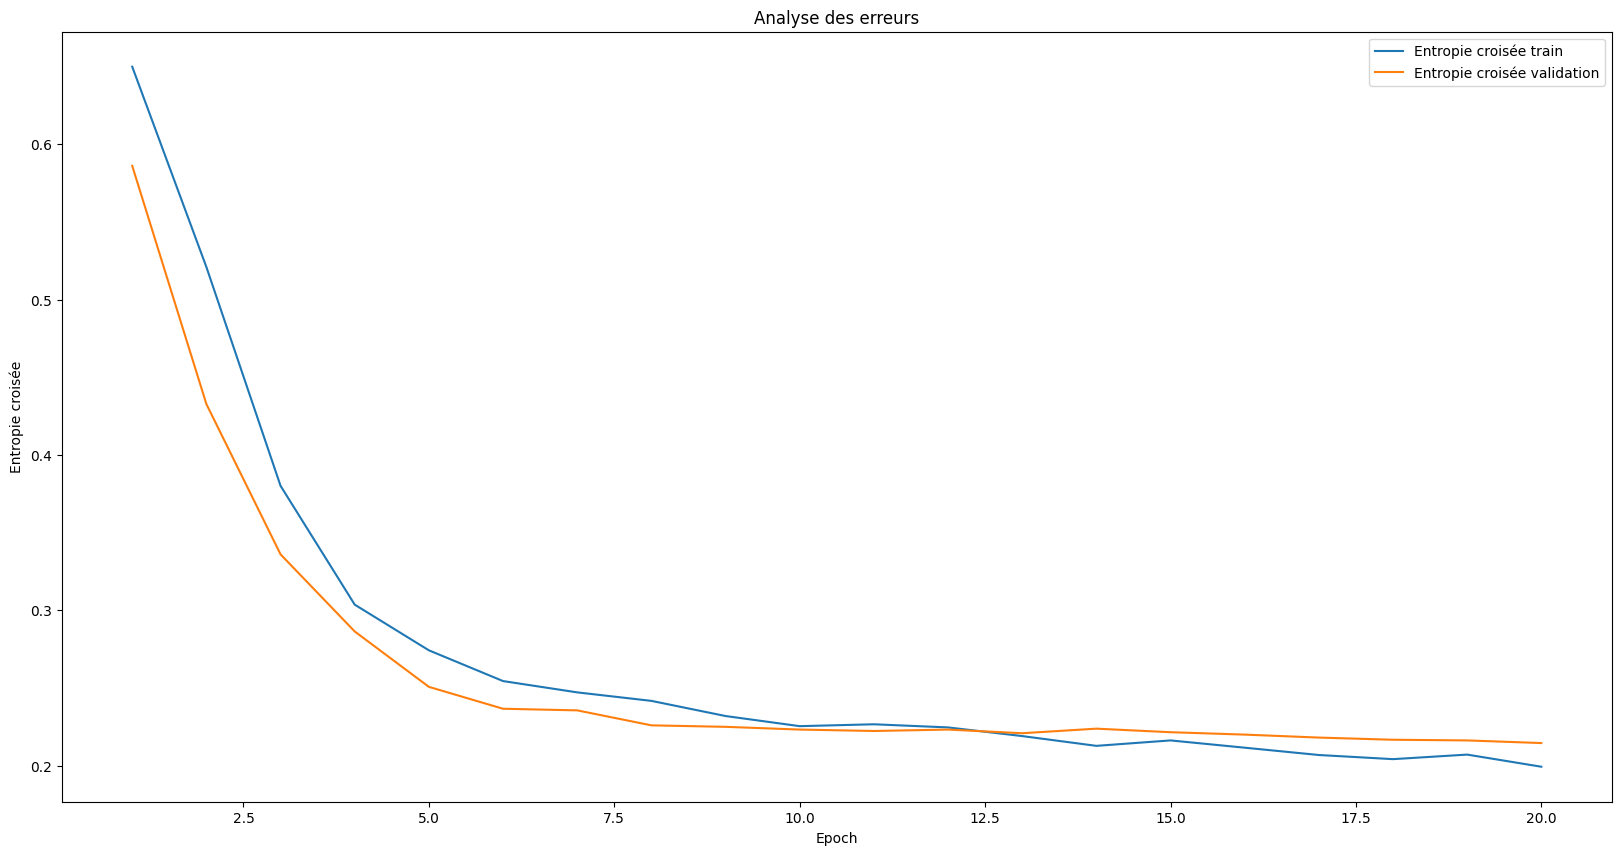

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Entropie croisée')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Entropie croisée train', 'Entropie croisée validation'])
plt.show()

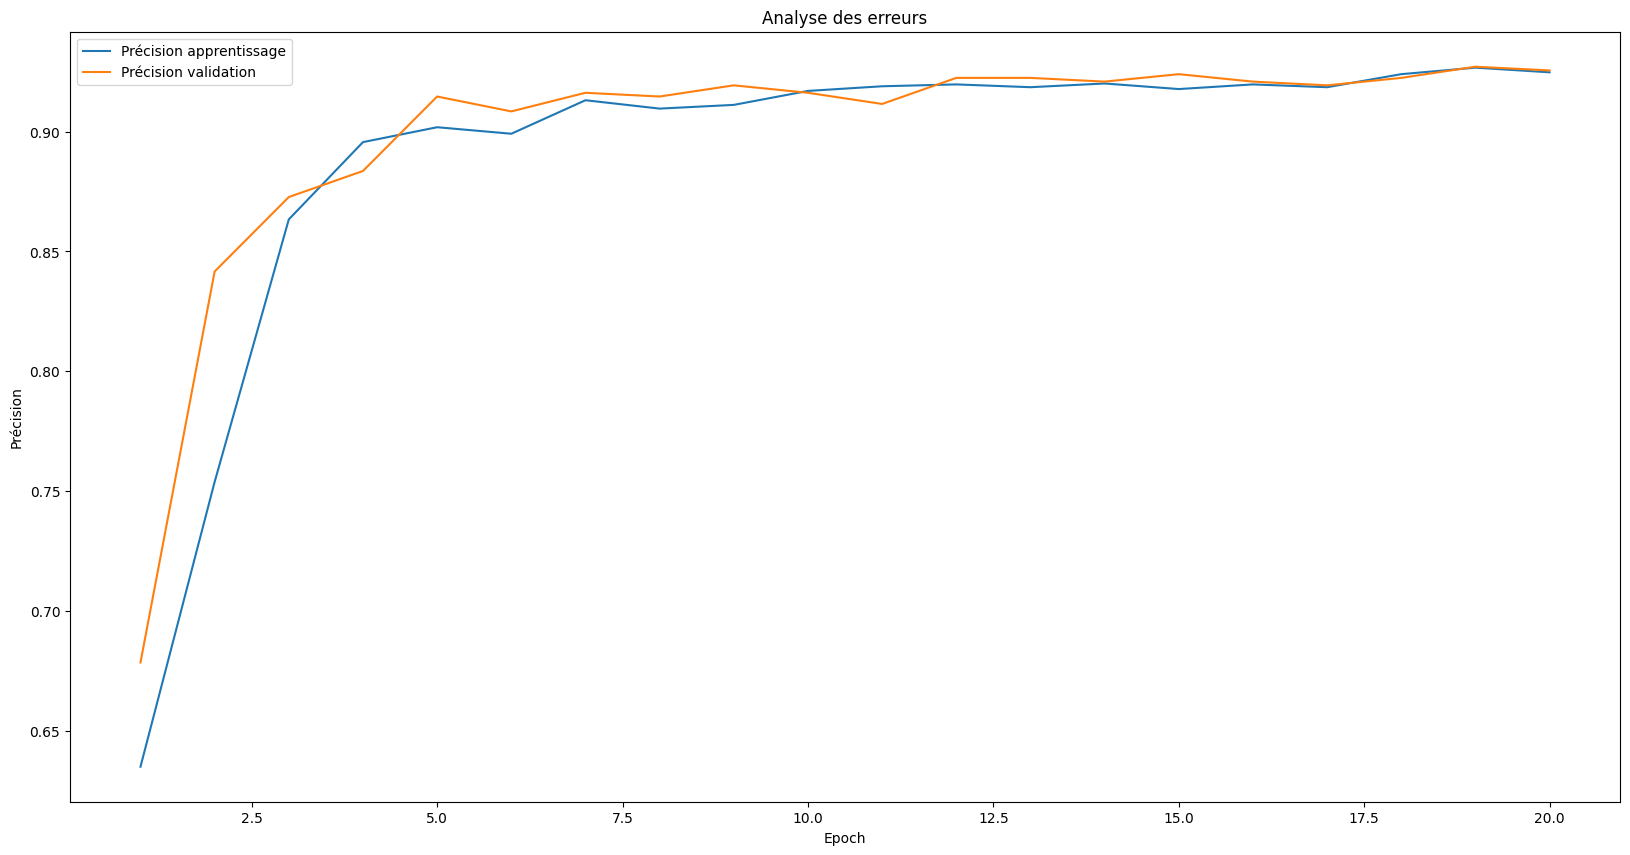

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
plt.legend(['Précision apprentissage', 'Précision validation'])
plt.show()

test

Architecture vue en cours

In [ ]:
num_layer1 = 100
num_layer2 = 100

model = keras.Sequential([
    keras.layers.Input(57, name='Input_layer'),
    keras.layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
    keras.layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
    keras.layers.Dense(10, activation='sigmoid', name='Output_layer')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = A_model.fit(x_train,
                 y_train,
                 batch_size=32,
                 epochs=10,
                 validation_split=0.2)